In [1]:
import xarray as xr
from osgeo import gdal,osr
import matplotlib.pyplot as plt
import rioxarray
import rasterio
import os
from datetime import datetime, timedelta

# 1. Open band with xarray

In [58]:
ndvi_path = 'HDF4_EOS:EOS_GRID:"NDVI_HDF/MYD13A1.A2021265.h20v05.061.2021282014223.hdf":MODIS_Grid_16DAY_500m_VI:"500m 16 days NDVI"'
evi_path = 'HDF4_EOS:EOS_GRID:"NDVI_HDF/MYD13A1.A2021265.h20v05.061.2021282014223.hdf":MODIS_Grid_16DAY_500m_VI:"500m 16 days EVI"'

In [59]:
ndvi = xr.open_dataset(ndvi_path, engine = 'rasterio')
evi = xr.open_dataset(evi_path, engine = 'rasterio')

In [60]:
ndvi

<xarray.Dataset>
Dimensions:      (band: 1, x: 2400, y: 2400)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.224e+06 2.225e+06 ... 3.335e+06 3.336e+06
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [61]:
ndvi.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [62]:
ndvi_32636 = ndvi.rio.reproject("EPSG:32636")

In [63]:
ndvi_32636

<xarray.Dataset>
Dimensions:      (x: 3717, y: 2835, band: 1)
Coordinates:
  * x            (x) float64 -4.576e+05 -4.572e+05 ... 1.026e+06 1.026e+06
  * y            (y) float64 4.45e+06 4.45e+06 4.45e+06 ... 3.319e+06 3.319e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    band_data    (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan

# Plot the data 
## Other options for cmap are: viridis, cviridis, inferno, plasma, magma etc.
https://matplotlib.org/stable/users/explain/colors/colormaps.html

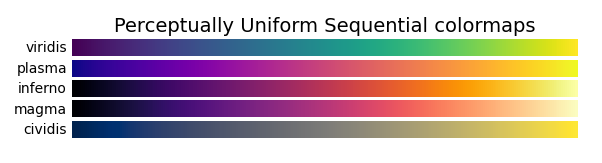

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r','inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r','pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c','tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

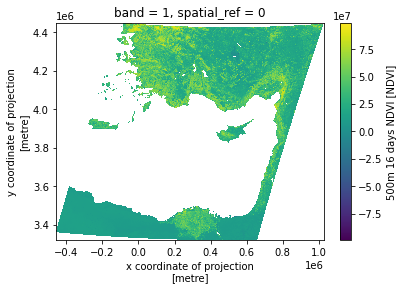

In [64]:
ndvi_32636.band_data.plot(cmap='viridis')

### <center>a. Clean image attributes</center>

### Delete dimention band

In [65]:
ndvi_32636 = ndvi_32636.squeeze()
ndvi_32636

<xarray.Dataset>
Dimensions:      (x: 3717, y: 2835)
Coordinates:
  * x            (x) float64 -4.576e+05 -4.572e+05 ... 1.026e+06 1.026e+06
  * y            (y) float64 4.45e+06 4.45e+06 4.45e+06 ... 3.319e+06 3.319e+06
    band         int64 1
    spatial_ref  int64 0
Data variables:
    band_data    (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [66]:
#Delete coordinates band and spatial_ref
ndvi_32636 = ndvi_32636.drop(['band','spatial_ref'])
ndvi_32636

<xarray.Dataset>
Dimensions:    (x: 3717, y: 2835)
Coordinates:
  * x          (x) float64 -4.576e+05 -4.572e+05 ... 1.026e+06 1.026e+06
  * y          (y) float64 4.45e+06 4.45e+06 4.45e+06 ... 3.319e+06 3.319e+06
Data variables:
    band_data  (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [67]:
#Rename Data variable to ndvi
ndvi_32636 = ndvi_32636.rename({'band_data':'ndvi'})
ndvi_32636

<xarray.Dataset>
Dimensions:  (x: 3717, y: 2835)
Coordinates:
  * x        (x) float64 -4.576e+05 -4.572e+05 ... 1.026e+06 1.026e+06
  * y        (y) float64 4.45e+06 4.45e+06 4.45e+06 ... 3.319e+06 3.319e+06
Data variables:
    ndvi     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

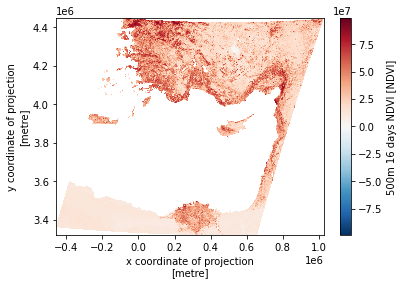

In [68]:
ndvi_32636.ndvi.plot()

<div class="alert alert-block alert-warning"> Apply the same functions on EVI. </div>

In [69]:
#Reproject
evi_32636 = evi.rio.reproject("EPSG:32636")
#Delete dimention band and coordinates band and spatial_ref
evi_32636 = evi_32636.squeeze()
evi_32636 = evi_32636.drop(['band','spatial_ref'])
#Rename Data variable to evi
evi_32636 = evi_32636.rename({'band_data':'evi'})
evi_32636

<xarray.Dataset>
Dimensions:  (x: 3717, y: 2835)
Coordinates:
  * x        (x) float64 -4.576e+05 -4.572e+05 ... 1.026e+06 1.026e+06
  * y        (y) float64 4.45e+06 4.45e+06 4.45e+06 ... 3.319e+06 3.319e+06
Data variables:
    evi      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

<div class="alert alert-block alert-info"> <b>NOTE</b> Dimension sizes of <b>ndvi</b> and <b>evi</b> should be identical! </div>

### <center> b. Crop dataset </center>

<b><u>sel</u></b> method: select data based on labels or values from the coordinates, allowing you to retrieve data using human-readable labels such as time or latitude.<br><br>
<b><u>isel</u></b> method: select data based on integer positions along the coordinates. It allows you to access data using numerical indices, making it useful for selecting data by position rather than label.

In [70]:
ndvi_sel_cyprus = ndvi_32636.sel(y=slice(3988000, 3775000), x=slice(430000, 670000))

In [71]:
ndvi_sel_cyprus

<xarray.Dataset>
Dimensions:  (x: 601, y: 533)
Coordinates:
  * x        (x) float64 4.303e+05 4.307e+05 4.311e+05 ... 6.694e+05 6.698e+05
  * y        (y) float64 3.988e+06 3.987e+06 3.987e+06 ... 3.776e+06 3.775e+06
Data variables:
    ndvi     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

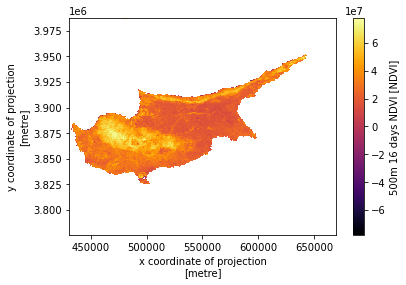

In [72]:
ndvi_sel_cyprus.ndvi.plot(cmap = 'inferno')

In [73]:
ndvi_isel_cyprus = ndvi_32636.isel(y=slice(1200, 1700), x=slice(2200, 2800))

In [74]:
ndvi_isel_cyprus

<xarray.Dataset>
Dimensions:  (x: 600, y: 500)
Coordinates:
  * x        (x) float64 4.207e+05 4.211e+05 4.215e+05 ... 6.594e+05 6.598e+05
  * y        (y) float64 3.971e+06 3.971e+06 3.97e+06 ... 3.772e+06 3.772e+06
Data variables:
    ndvi     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

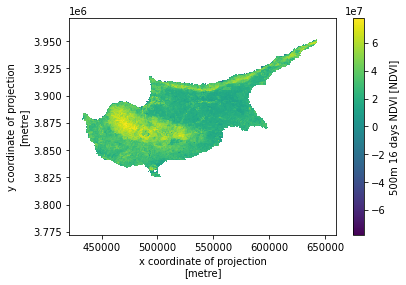

In [75]:
ndvi_isel_cyprus.ndvi.plot(cmap = 'viridis')

<div class="alert alert-block alert-warning"> Apply the same functions on EVI. </div>

In [76]:
evi_sel_cyprus = evi_32636.sel(y=slice(3988000, 3775000), x=slice(430000, 670000))
evi_isel_cyprus = evi_32636.isel(y=slice(1200, 1700), x=slice(2200, 2800))

### <center> c. Concat ndvi and evi </center>

In [77]:
vegetation = xr.merge([ndvi_isel_cyprus, evi_isel_cyprus])
vegetation

<xarray.Dataset>
Dimensions:  (x: 600, y: 500)
Coordinates:
  * x        (x) float64 4.207e+05 4.211e+05 4.215e+05 ... 6.594e+05 6.598e+05
  * y        (y) float64 3.971e+06 3.971e+06 3.97e+06 ... 3.772e+06 3.772e+06
Data variables:
    ndvi     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    evi      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

### <center> d. Add date to dimensions </center>

In [78]:
os.path.basename(ndvi_path)

'MYD13A1.A2021265.h20v05.061.2021282014223.hdf":MODIS_Grid_16DAY_500m_VI:"500m 16 days NDVI"'

In [79]:
date_str = os.path.basename(ndvi_path).split('.')[1][1:8]
date_str

'2021265'

In [80]:
#Calculate the date
doy = date_str[4:]
year = int(date_str[:4])
date = datetime(year, 1, 1) + timedelta(int(doy) - 1)
print(date)

2021-09-22 00:00:00


In [81]:
#Assign date to vegetation dataset
vegetation = vegetation.assign_coords(time=date)
vegetation = vegetation.expand_dims('time')
print(vegetation)

<xarray.Dataset>
Dimensions:  (x: 600, y: 500, time: 1)
Coordinates:
  * x        (x) float64 4.207e+05 4.211e+05 4.215e+05 ... 6.594e+05 6.598e+05
  * y        (y) float64 3.971e+06 3.971e+06 3.97e+06 ... 3.772e+06 3.772e+06
  * time     (time) datetime64[ns] 2021-09-22
Data variables:
    ndvi     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    evi      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan


In [82]:
vegetation

<xarray.Dataset>
Dimensions:  (x: 600, y: 500, time: 1)
Coordinates:
  * x        (x) float64 4.207e+05 4.211e+05 4.215e+05 ... 6.594e+05 6.598e+05
  * y        (y) float64 3.971e+06 3.971e+06 3.97e+06 ... 3.772e+06 3.772e+06
  * time     (time) datetime64[ns] 2021-09-22
Data variables:
    ndvi     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    evi      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan

In [83]:
#Make the filename based on date
veg_dest_path = 'vegetation_nc'
yyyymmdd = date.strftime('%Y%m%d')
nc_file_name = os.path.join(veg_dest_path, f'{yyyymmdd}_veg.nc')

In [84]:
#save the file to an nc file
vegetation.to_netcdf(nc_file_name)

In [85]:
vegetation

<xarray.Dataset>
Dimensions:  (x: 600, y: 500, time: 1)
Coordinates:
  * x        (x) float64 4.207e+05 4.211e+05 4.215e+05 ... 6.594e+05 6.598e+05
  * y        (y) float64 3.971e+06 3.971e+06 3.97e+06 ... 3.772e+06 3.772e+06
  * time     (time) datetime64[ns] 2021-09-22
Data variables:
    ndvi     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    evi      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan

# Open a band with gdal

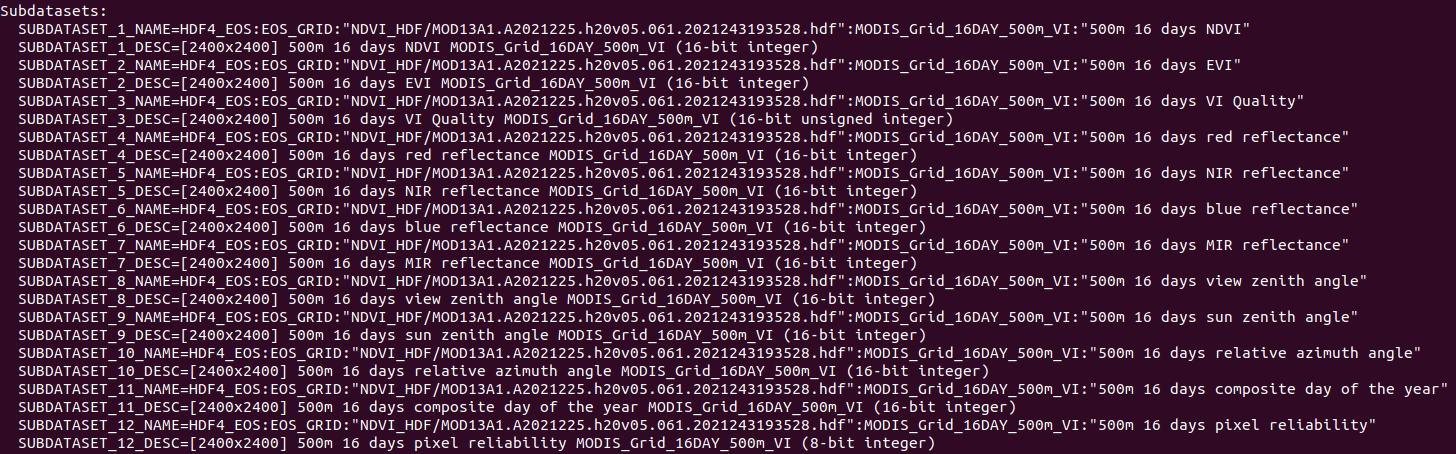<b><center><font size="4"> <br> gdalinfo result run from terminal</b></center></font>

In [269]:
#ds = gdal.Open('HDF4_EOS:EOS_GRID:"NDVI_HDF/MOD13A1.A2021225.h20v05.061.2021243193528.hdf":MODIS_Grid_16DAY_500m_VI:"500m 16 days NDVI"')
ds = gdal.Open('HDF4_EOS:EOS_GRID:"NDVI_HDF/MOD13A1.A2021225.h20v05.061.2021243193528.hdf":MODIS_Grid_16DAY_500m_VI:"500m 16 days EVI"')

data = ds.ReadAsArray()

In [270]:
data

array([[-3000, -3000, -3000, ...,  1833,  2136,  2560],
       [-3000, -3000, -3000, ...,  1801,  1822,  1822],
       [-3000, -3000, -3000, ...,  1695,  1695,  1732],
       ...,
       [ 1006,  1040,  1005, ...,   942,   943,   968],
       [  942,  1006,   987, ...,   911,   890,   853],
       [  944,   993,  1047, ...,   923,   881,   864]], dtype=int16)

# Plot the data 
## Other options for cmap are: viridis, cviridis, inferno, plasma, magma etc.
https://matplotlib.org/stable/users/explain/colors/colormaps.html

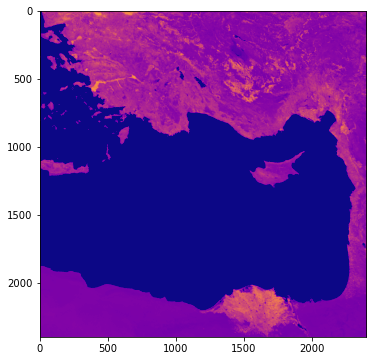

In [271]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(data, cmap=plt.cm.plasma, vmin=-2000, vmax=10000)

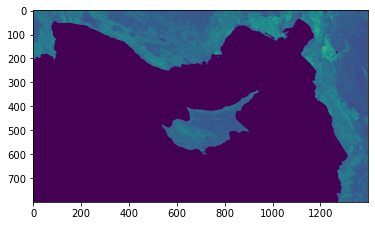

In [272]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(data[700:1500,1000:2500], cmap=plt.cm.viridis, vmin=-2000, vmax=10000)

In [273]:
# Create a new GeoTIFF file for output
output_file = '2021225_NDVI.tif'

In [274]:
# Define the output projection (WGS84)
srs = osr.SpatialReference()
srs.ImportFromEPSG(32636)  # EPSG code for UTM Zone 36N.

0

In [275]:
# Get the geotransform from the MODIS dataset
geotransform = ds.GetGeoTransform()

<b>geotransform</b>: (top-left X-coordinate (longitude), X resolution, X rotation, top-left Y-coordinate (latitude), Y rotation, Y resolution)

<b>Y resolution is often negative for datasets where the Y-coordinate decreases as you move down the image.</b>

In [276]:
geotransform

(2223901.039333,
 463.3127165279167,
 0.0,
 4447802.078667,
 0.0,
 -463.3127165279167)

In [277]:
# Create the output GeoTIFF
driver = gdal.GetDriverByName('GTiff')
output_ds = driver.Create(output_file, ds.RasterXSize, ds.RasterYSize, 1, gdal.GDT_Float32)

In [278]:
# Set the output projection and geotransform
output_ds.SetProjection(srs.ExportToWkt())
output_ds.SetGeoTransform(geotransform)

0

In [279]:
# Write the data to the output GeoTIFF
output_band = output_ds.GetRasterBand(1)
output_band.WriteArray(data)

0

In [280]:
# Close both datasets
ds = None
output_ds = None

print(f'GeoTIFF saved to {output_file}')

GeoTIFF saved to 2021225_NDVI.tif


<b>The resulted image is not positioned correctly in space (Image from QGIS)</b>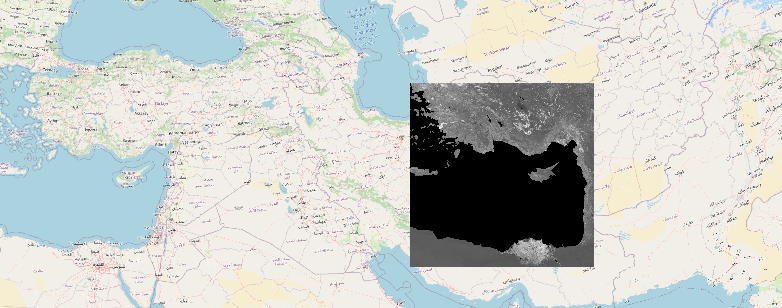<br>GDAL does not recognize the CRS/Transform information from the dataset. As such, transforming the dataset is not possible as the original information cannot be detected. Here are some extra intsructions to handle this https://gis.stackexchange.com/questions/345691/using-python-gdal-to-reproject-an-hdf.